# TestCase3 - Convergence FEM / PINNs+Corr

In [1]:
# sélection du cas test
testcase = 3
size_param = "big"
largenet = False
param_num = 1
high_degree = 10

In [2]:
assert testcase == 3
assert size_param in ["small","medium","big","new"]

**Idée :** On se place ici dans le TestCase3.

On cherche à vérifier les convergences obtenues pour

- FEM standard
- le PINNs + Correction par addition

On choisira d'effectuer ces convergences en P1,P2 et P3

## Imports + Load

In [3]:
%load_ext autoreload
%autoreload 2

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import pandas as pd
import os
import dolfin as df
import seaborn as sns
import dataframe_image as dfi

# from modfenics.fenics_expressions.fenics_expressions_2D import UexExpr
from scimba.equations.domain import SpaceTensor
from scimba.equations import domain

from testcases.utils import create_tree
from testcases.geometry.geometry_2D import Square
from modfenics.fenics_expressions.fenics_expressions import FExpr,AnisotropyExpr
from modfenics.utils import get_param,compute_slope
from modfenics.error_estimations.fem import compute_error_estimations_fem_deg,compute_error_estimations_fem_all
from modfenics.error_estimations.add import compute_error_estimations_Corr_deg,compute_error_estimations_Corr_all,plot_Corr_vs_FEM
from modfenics.error_estimations.mult import compute_error_estimations_Mult_deg,compute_error_estimations_Mult_all,plot_Mult_vs_FEM

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [6]:
if size_param != "new":
    from testcases.networks.test_2D.test_3.test_3_v1 import Run_laplacian2D,Poisson_2D
else:
    from testcases.networks.test_2D.test_3.test_3_v2 import Run_laplacian2D,Poisson_2D
from testcases.problem.problem_2D import TestCase3
from modfenics.solver_fem.EllipticDirSquareFEMSolver import EllipticDirSquareFEMSolver

    
problem = TestCase3(version=size_param)

dim_params = problem.nb_parameters
result_dir = "../../../results/fenics/test_2D/testcase"+str(testcase)+"/"+size_param
if size_param == "medium" and largenet:
    result_dir += "_largenet"
result_dir += "/cvg/"
create_tree(result_dir)

torch loaded; device is cpu


>> load network /home/u2/lecourtier/Article1/networks/test_2D/test_fe3.pth
network loaded


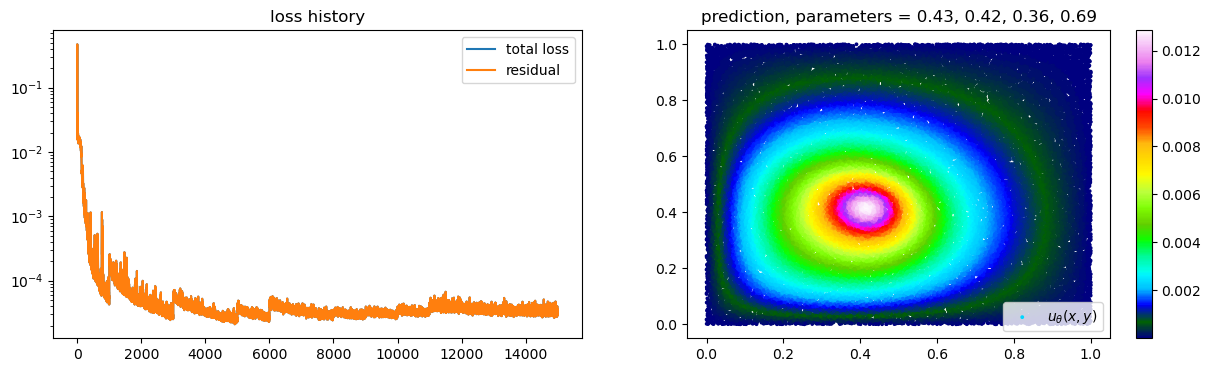

In [7]:
if size_param != "new":
    pde = Poisson_2D(size_param)
    trainer,u_theta = Run_laplacian2D(pde,size_param,largenet)
else:
    pde = Poisson_2D()
    trainer,u_theta = Run_laplacian2D(pde)

## Convergence FEM

In [8]:
# degree = 2
# df_FEM, tab_nb_vert_FEM, tab_h_FEM, tab_err_FEM = compute_error_estimations_fem_deg(param_num,problem,degree,high_degree,new_run=False,result_dir=result_dir)

../../../results/fenics/test_2D/testcase3/big/cvg/u_ref/u_ref_1.npy
## Read csv file ../../../results/fenics/test_2D/testcase3/big/cvg/FEM_case3_vbig_param1_degree1.csv
../../../results/fenics/test_2D/testcase3/big/cvg/u_ref/u_ref_1.npy
## Read csv file ../../../results/fenics/test_2D/testcase3/big/cvg/FEM_case3_vbig_param1_degree2.csv
../../../results/fenics/test_2D/testcase3/big/cvg/u_ref/u_ref_1.npy
## Read csv file ../../../results/fenics/test_2D/testcase3/big/cvg/FEM_case3_vbig_param1_degree3.csv


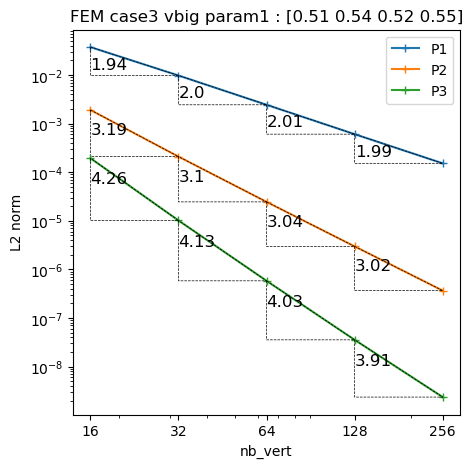

In [9]:
compute_error_estimations_fem_all(param_num,problem,high_degree,new_run=False,result_dir=result_dir,plot_cvg=True)

## Convergence PINNs+Corr

In [10]:
# degree = 2
# df_Corr, tab_nb_vert_Corr, tab_h_Corr, tab_err_Corr = compute_error_estimations_Corr_deg(param_num,problem,degree,high_degree,u_theta,new_run=False,result_dir=result_dir)

../../../results/fenics/test_2D/testcase3/big/cvg/u_ref/u_ref_1.npy
## Read csv file ../../../results/fenics/test_2D/testcase3/big/cvg/Corr_case3_vbig_param1_degree1.csv
../../../results/fenics/test_2D/testcase3/big/cvg/u_ref/u_ref_1.npy
## Read csv file ../../../results/fenics/test_2D/testcase3/big/cvg/Corr_case3_vbig_param1_degree2.csv
../../../results/fenics/test_2D/testcase3/big/cvg/u_ref/u_ref_1.npy
## Read csv file ../../../results/fenics/test_2D/testcase3/big/cvg/Corr_case3_vbig_param1_degree3.csv


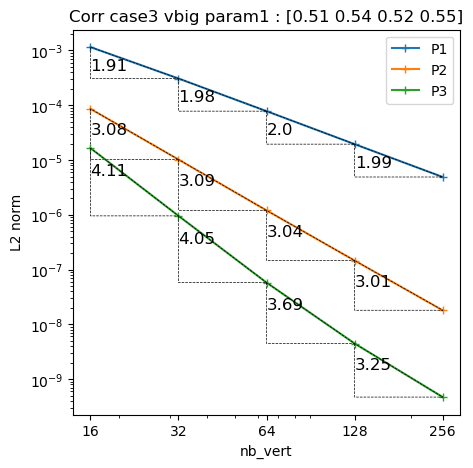

In [11]:
compute_error_estimations_Corr_all(param_num,problem,high_degree,u_theta,new_run=False,result_dir=result_dir,plot_cvg=True)

### Plots FEM-Corr

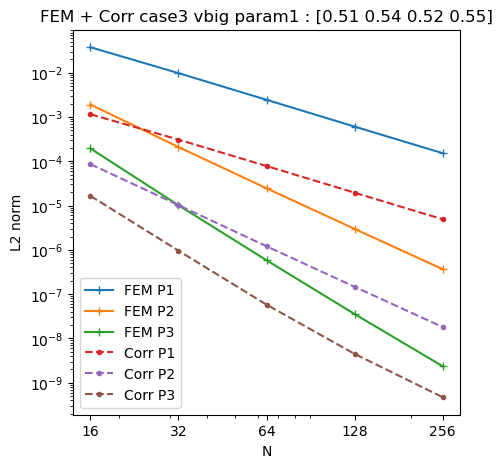

In [12]:
plot_Corr_vs_FEM(param_num,problem,result_dir=result_dir)

## Convergence PINNs+Mult

In [ ]:
# M=0.0
# degree = 2
# df_Corr, tab_nb_vert_Corr, tab_h_Corr, tab_err_Corr = compute_error_estimations_Mult_deg(param_num,problem,degree,high_degree,u_theta,M=M,new_run=False,result_dir=result_dir)

In [14]:
tab_M = [0.0,0.1,1.0,100.0]

for M in tab_M:
    print("#### M = ",M)
    compute_error_estimations_Mult_all(param_num,problem,high_degree,u_theta,M=M,new_run=False,result_dir=result_dir,plot_cvg=True)

#### M =  0.0
../../../results/fenics/test_2D/testcase3/big/cvg/u_ref/u_ref_1.npy
## Run error estimation with Corr (mult) for degree=1
V_ex created with  501  vertices and degree  4  : h_ex = 0.0028284271247461927
V_ref created with  1000  vertices and degree  3
Load reference solution
Time to generate mesh:  0.000308990478515625
Mesh created with  16  vertices : h = 0.09428090415820647
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Time to assemble the matrix :  26.62583327293396
Time to solve the system : 0.009128093719482422
Time to compute the error : 7.200536251068115
nb_vert=16, norme_L2=0.026315378610861827
Time to generate mesh:  0.00023412704467773438
Mesh created with  32  vertices : h = 0.045619792334616084
Time to assemble the matrix :  2.940722703933716
Time to solve the system : 0.020581960678100586
Time to compute the error : 7.298876762390137
nb_vert=32, norme_L2=0.008136088930874643
T

KeyboardInterrupt: 

<Figure size 500x500 with 0 Axes>